In [2]:
using Polynomials
using QuadGK
using LinearAlgebra
using Plots
pyplot();

##  Chebyshev Polynomials 

We should derive from Chebyshev points, which is the projection of uniform points with respect to angle to the $x$ axis. To be exactly, it is
$$
    x_j = -\cos \left(\frac{j\pi}{n}\right)
$$

on complex plane, it is the projection of  upper side of the unit ring $|z| = 1$, and there is $z_j = e^{i \theta j}$ and 
$$
    x_j = \frac{z_j + z_j^{-1}}{2}
$$

Notice that on the unit ring $|z| = 1$, $z^{-1} = \bar z$. 

Define Chebyshev Polynomial, 
$$
    T_k(x) = \text{Re}(z^k)
$$
they are seen as a basis, similar to cardinal functions in interpolation.

We can easily derive that 
$$
    T_{k+1}(x) = 2xT_k(x) - T_{k - 1}(x)
$$

We have got a theorem here: if $f$ Lipshitz continuous on $[-1,1]$, then, it has unique Chebyshev serie 
$$
    f(x) = \sum_{k=0}^{\infty} a_k T_k(x)
$$
the coefficents here are $a_0 = \frac{1}{\pi} \int_{-1}^1 \frac{f(x)T_0(x)}{\sqrt{1 - x^2}}dx$ for $k = 0$, and $a_k = \frac{2}{\pi} \int_{-1}^1 \frac{f(x)T_k(x)}{\sqrt{1 - x^2}}dx$ for $k \neq 0$

The followings are Chebyshev polynomials of low degrees, they can be computed easily by the former induction formula. 

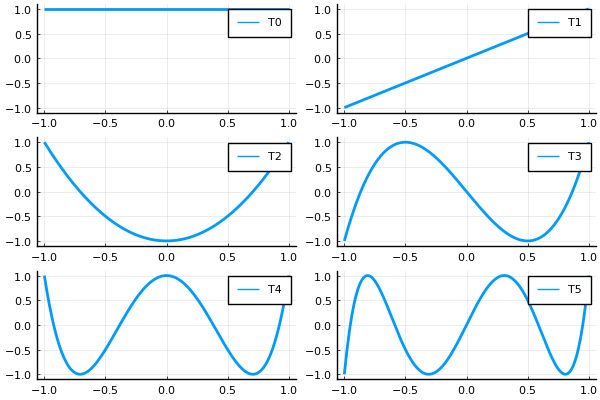

In [6]:
begin
    T0 = ChebyshevT([1])
    T1 = ChebyshevT([0, 1])
    T2 = ChebyshevT([0, 0, 1])
    T3 = ChebyshevT([0, 0, 0, 1])
    T4 = ChebyshevT([0, 0, 0, 0, 1])
    T5 = ChebyshevT([0, 0, 0, 0, 0, 1])
     T50 = ChebyshevT(vcat(zeros(50), 1))
    allT = [T0, T1, T2, T3, T4, T5]
    Tlabels = ["T$n" for n in 0:5]
    xx = range(-1, 1, length=200)
    Ps = [ plot(xx, f.(xx), label = Tlabels[n], lw=2, yaxis = [-1.1,1.1])
    for (n, f) in enumerate(allT) ]
    plot(Ps..., layout = (3,2))
    end

<div style="border: 1px solid black; padding: 10px; margin: 10px 0; background-color: #f9f9f9;">
  <strong>Theorem 1:</strong> 
  
 If $f$ is Lipchitz-continuous on $[-1,1]$, then it has a unique Chebyshev series.

 $$
    f(x) = \sum_{k = 0 }^{\infty} a_k T_k(x)
 $$
 where 
 $$
    a(k) =  \left\{ \begin{aligned} \frac{1}{\pi} \int_{-1} ^{1} \frac{f(x) T_k(x)}{\sqrt{1 - x^2}}dx \\ \frac{2}{\pi} \int_{-1} ^{1} \frac{f(x) T_k(x)}{\sqrt{1 - x^2}}dx \end{aligned} \right.
 $$

</div>

This series converges uniformly and absolutely, and the speed of convergence relies on the speed of decline of parameter $a_k$. 

It is funny that the paramrter series of Chebyshev projection and Chebyshev interpolation $f_n(x) = \sum{a_k T_k(x)} $ (Apply Lagrange interpolation into Cheybyshev points, $p_n(x) = \sum{c_k\phi_k(x)}) $ are quite same. 

It also reminds us that interpolation is not the only method to approxiamate a function, this is important for our further study of spectral method. 




## Chebyshev Coefficients for Differentiable Functions

In fact, the order of the apptoximation of the Chebyshev projection relies on the original function itself. The regularity of the original function determines the efficiency of approximation.

We first see the $\nu$-th order differentiable functions:

<div style="border: 1px solid black; padding: 10px; margin: 10px 0; background-color: #f9f9f9;">
  <strong>Theorem 2:</strong> 
  
Let $ \nu > 0 $ an integer, $f$ has its $\nu $ ordered derivatives, and is uniformly continous on $[-1,1]$, set $w := \|f^{\nu + 1} \|_{L^1}  < \infty$, then 

$$
  |a_k| \leq \frac{2w}{\pi k(k - 1)\cdots (k - \nu)} \leq \frac{2w}{\pi (k - \nu)^{\nu + 1}}, \forall k \geq \nu + 1
$$

</div>

We shall yield the following corollary by **Theorem 2** above. 

<div style="border: 1px solid black; padding: 10px; margin: 10px 0; background-color: #f9f9f9;">
  <strong>Corollary 3:</strong> 
  
Let $ \nu > 0 $ an integer, $f$ has its $\nu $ ordered derivatives, and is uniformly continous on $[-1,1]$, if $f_n(x) = \sum_{k = 0}^{n} a_k T_k(x)$, then 
$$\|f - f_n\| \leq \frac{2 \nu}{\pi \nu (n - \nu)^{\nu}}$$

</div>

We shall find that the $\nu$ on the power of the denominator determines the value of the error. And it is obvious that **the smoother** the function is, **the better** the approximation is, too.

Can we refine the regularity to achieve a better approx???

## Chebyshev Coefficients for Analytic Functions

It is natural for us to pay attention to analytic functions, due to our last observation. 

We will first induce a tool from the Complex Analysis, Bernstein Ellipse.

For $\rho > 1$, the set 
$$
    \{x = \frac{1}{2} (z + z^{-1}),|z| = \rho\}
$$
represents a ellipse, called Bernstein Ellipse.

<div style="border: 1px solid black; padding: 10px; margin: 10px 0; background-color: #f9f9f9;">
  <strong>Theorem 4:</strong> 
  
For an analytic $f$ on $[-1,1]$, assuming that $f$ can be analytically prolonged to the Bernstein Ellipse $E_\rho, \rho > 1$, and $\exists M > 0$, such that $|f(x)| \leq M$, then the Chebyshev coeffcient of $f$ 
$$|a_k| \leq 2M \rho ^{-k}, \forall k \geq 1$$



</div>


We also yield a corollary

<div style="border: 1px solid black; padding: 10px; margin: 10px 0; background-color: #f9f9f9;">
  <strong>Corollary 5:</strong> 
  
For the $f$ above, we have
$$\|f - f_n\| \leq \frac{2M}{\rho - 1}\rho ^{-n}$$

</div>